# PySpark

Installation: open anaconda navigator (terminal) in admin mode and run: **conda install pyspark**

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 54.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=7fa55a155cc9a9e320b9e174d42252fa6f5db11a00aad66d6e62fbd7a92ba131
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [1]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark import SparkContext

In [ ]:
!pip install findspark

In [2]:
import findspark
findspark.init()

In [3]:
sc =SparkContext()

In [4]:
sqlContext = SQLContext(sc)
sc.version

C:\ProgramData\Anaconda3\envs\pyspark\lib\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


'3.2.1'

In [5]:
#SparkContext version
sc.version

#Python version of SparkContext
sc.pythonVer

#master is the URL of the cluster or "local" string to run in local mode
sc.master

#loading data in PySpark

#method 1: parallelize() method
rdd = sc.parallelize([1,2,3,4,5])

#method 2: textfile() method
rdd2 = sc.textFile("text.txt")


#parallelize() method with partitions
rdd = sc.parallelize([1,2,3,4,5], 6)

#textfile() method with partitions
rdd2 = sc.textFile("text.txt")


In [6]:
rdd

ParallelCollectionRDD[3] at readRDDFromFile at PythonRDD.scala:274

In [7]:
rdd.collect()

[1, 2, 3, 4, 5]

In [8]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "Spark framework", "for", "Big Data processing"])

RDD.filter(lambda x: "Spark" in x).collect()

['Spark', 'Spark framework']

In [9]:
# Create a Python list of numbers from 1 to 100 
numb = range(1, 100)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

# Functional Programming in Python

PySpark becomes a lot easier if we understand functional programming principles in Python. 

A lambda function creates a function to be called later in the program. However, it returns the function instead of assigning it to a name. This is why lambdas are known as anonymous functions. In practice, they are used as a way to inline a function definition, or to defer execution of a code. Lambda functions can be used whenever function objects are required. They can have any number of arguments but only one expression and the expression is evaluated and returned.

In [10]:
#Example. Create a function that doubles the input it receives
def double(x):
    return 2*x

double(2)

4

In [11]:
#with a lambda function
double = lambda x: x*2
print(double(2))

4


#Note that they both do the same. 
#Note that the lambda function does not include a return statement. 
#You do not have to assign it to a varible
#Used when a function is required for a short period of time
map() function takes a function and a list and returns a new list which contains items returned by that function for each item.

## General syntax of map():

In [12]:
#Example of map() with a lambda function as an inline function:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list(map(lambda x: x*x, my_list))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## General syntax of filter():

In [13]:
#filter(function, list)
items = [1, 2, 3, 4]
list(filter(lambda x: x%2 != 0, items))

[1, 3]

In [14]:
#filter numbers divisible by 10
my_list = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
list(filter(lambda x: x%10 == 0, my_list))

[10, 40, 60, 80]

## Transformations

### Map

In [15]:
text = ['This is some random text about learning Spark', 'This is also some random text no Spark', 'more random text', 'even more', 'that is it', 'no more']
RDD = sc.parallelize(text)

In [16]:
### Filter

In [19]:
RDD.flatMap(lambda s: s.split(" ")).take(3)

['This', 'is', 'some']

In [ ]:
filteredLines = RDD.filter(lambda line: line.find('Spark')>0)
filteredLines.take(5)

['This is some random text about learning Spark',
 'This is also some random text no Spark']

### ReduceByKey

In [20]:
splitLines = RDD.flatMap(lambda line: line.split())
splitLines.take(5)

['This', 'is', 'some', 'random', 'text']

In [21]:
words = splitLines.map(lambda word: (word, 1))
words.take(5)

[('This', 1), ('is', 1), ('some', 1), ('random', 1), ('text', 1)]

In [22]:
counts = words.reduceByKey(lambda a, b: a+b)
counts.take(10)

[('learning', 1),
 ('random', 3),
 ('that', 1),
 ('also', 1),
 ('it', 1),
 ('some', 2),
 ('This', 2),
 ('no', 2),
 ('even', 1),
 ('more', 3)]

### flatMap

In [23]:
splitLines = RDD.flatMap(lambda line: line.split())
splitLines.collect()

['This',
 'is',
 'some',
 'random',
 'text',
 'about',
 'learning',
 'Spark',
 'This',
 'is',
 'also',
 'some',
 'random',
 'text',
 'no',
 'Spark',
 'more',
 'random',
 'text',
 'even',
 'more',
 'that',
 'is',
 'it',
 'no',
 'more']

### union

In [24]:
data1 = sc.parallelize([1, 2, 3, 4, 5])
data2 = sc.parallelize([6, 7, 8, 9, 10])

In [25]:
data = data1.union(data2)

In [26]:
data.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### sample

In [27]:
datasample = data.sample(False, 0.5)
datasample.collect()

[4, 7, 10]

## intersection

In [28]:
intersection = data1.intersection(data)
intersection.collect()

[1, 2, 3, 4, 5]

## join

In [29]:
a = sc.parallelize([('John', 1), ('Tom', 2), ('Ben', 3)])
b = sc.parallelize([('John', 'CA'), ('Tom', 'GA'), ('Ben', 'VA')])

In [31]:
c = a.join(b)

In [32]:
c.collect()

[('John', (1, 'CA')), ('Tom', (2, 'GA')), ('Ben', (3, 'VA'))]

### groupByKey()

groups all the values with the same key

In [ ]:
airports = [('US', 'JFK'), ('UK', 'LHR'), ('FR', 'CDG'), ('US', 'SFO')]
RDD_airports = sc.parallelize(airports)

In [ ]:
RDD_airports.collect()

In [ ]:
RDD_airports_group = RDD_airports.groupByKey().collect()
for country, airport in RDD_airports_group:
    print(country, list(airport))

## Actions

## reduce

In [ ]:
lineLengths = RDD.map(lambda s: len(s))
totalLength = lineLengths.reduce(lambda a, b: a+b)
print(totalLength)

## collect

In [ ]:
RDD.collect()

['This is some random text about learning Spark',
 'This is also some random text no Spark',
 'more random text',
 'even more',
 'that is it',
 'no more']

In [ ]:
lineLengths = RDD.map(lambda s: len(s))
lineLengths.first()

45

## count

In [ ]:
RDD.count()

6

## first

In [ ]:
RDD.first()

'This is some random text about learning Spark'

## take

The *take* action returns the first *n* elements in a dataset

In [ ]:
RDD.map(lambda s: len(s)).take(3)

[45, 38, 16]

## takeSample

The *takeSample* action returns a sample containing a specified number of elements from a dataset with or without replacement

In [ ]:
data.takeSample(True, 5)

[1, 3, 8, 6, 5]

## saveAsTextFile

The *saveAsTextFile* action writes the elements in a dataset to a text file either on the local filesystem or HDFS.

In many cases, it is not advisable to run collect action on RDDs because of the huge size of the data. In these cases, it’s common to write data out to a distributed storage systems such as HDFS or Amazon S3. saveAsTextFile action can be used to save RDD as a text file inside a particular directory. By default, saveAsTextFile saves RDD with each partition as a separate file inside a directory.You can change it to return a new RDD that is reduced into a single partition using the coalesce method.

In [ ]:
RDD.saveAsTextFile('/path/to/file')

### Action Operations on Pair RDDs
#### countByKey()
#### collectAsMap()

## countByKey()

countByKey is only available on RDDs of type (Key, Value). With the countByKey operation, we can count the number of elements for each key. Here is an example of counting the number of values for each key in the dataset. In this example, we first create a pair RDD named rdd using SparkContext's parallelize method. Since countByKey generates a dictionary, next we iterate over the dictionary to print the each unique and number of values associated with each key as shown here. One thing to note is that countByKey should only be used on a dataset whose size is small enough to fit in memory. 

In [ ]:
rdd = sc.parallelize([('a',1), ('b',1), ('a',1)])
for key, val in rdd.countByKey().items():
    print(key, val)

a 2
b 1


In [ ]:
#from Datacamp
Rdd = sc.parallelize([(1, 2), (3, 4), (3, 6), (4, 5)])
# Count the unique keys
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


## collectAsMap()

returns the key-value pairs in the RDD as a dictionary. collectAsMap produces the key-value pairs in the RDD as a dictionary which can be used for downstream analysis. Similar to countByKey, this action should only be used if the resulting data is expected to be small, as all the data is loaded into the memory.

In [ ]:
rdd = sc.parallelize([(1,2), (3,4)])
rdd.collectAsMap()

{1: 2, 3: 4}

# Examples

#### Apache Spark Python program for computing word count

In [ ]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x+y).sortByKey(ascending = False)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


#### Apache Spark Python program for computing word count

In [ ]:
from pyspark import SparkContext

In [34]:
#Program 1: Count the number of words in a document

file_path = 'question2_book_v1.txt'

# Create a baseRDD from the file path
RDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = RDD.flatMap(lambda x: x.split())

len(splitRDD.collect())

1648

In [35]:
#Program 2: Convert the words in lower case and remove stop words from the stop_words list
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']

# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD.filter(lambda x: x.lower() not in stop_words).map(lambda w: (w, 1)).reduceByKey(lambda x, y: x + y).collect()

[('single', 4),
 ('possession', 2),
 ('good', 4),
 ('must', 8),
 ('However', 1),
 ('known', 2),
 ('views', 1),
 ('may', 6),
 ('entering', 1),
 ('neighbourhood', 3),
 ('minds', 1),
 ('families', 1),
 ('considered', 1),
 ('rightful', 1),
 ('daughters', 5),
 ('Mr', 23),
 ('Bennet', 14),
 ('said', 10),
 ('lady', 2),
 ('heard', 2),
 ('let', 2),
 ('last', 3),
 ('Long', 6),
 ('told', 1),
 ('know', 10),
 ('tell', 3),
 ('hearing', 1),
 ('invitation', 1),
 ('says', 1),
 ('young', 3),
 ('large', 2),
 ('came', 1),
 ('Monday', 1),
 ('chaise', 1),
 ('four', 3),
 ('delighted', 1),
 ('Morris', 1),
 ('take', 3),
 ('house', 1),
 ('end', 2),
 ('week', 1),
 ('name', 1),
 ('Bingley', 11),
 ('married', 2),
 ('Oh', 2),
 ('sure', 3),
 ('thousand', 2),
 ('year', 2),
 ('fine', 1),
 ('girls', 7),
 ('tiresome', 1),
 ('design', 1),
 ('Design', 1),
 ('nonsense', 3),
 ('likely', 1),
 ('fall', 1),
 ('love', 2),
 ('visit', 10),
 ('occasion', 1),
 ('go', 5),
 ('send', 2),
 ('perhaps', 2),
 ('like', 3),
 ('best', 1),
 (

In [ ]:
#Program 3: Word_count similar to what we did with map/reduce

#sc = SparkContext(appName="WordCountApp")
text = sc.textFile('/content/pride_and_prejudice.txt')
counts = text.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x+y)

output = counts.collect()

for (word, count) in output[:10]:
    print(word, count)

It 5
is 22
single 4
in 17
possession 2
of 47
good 4
must 8
However 1
known 2


In [ ]:
#Sort by Key
counts.sortByKey(ascending = False).collect()[:5]

[('that', 1), ('text', 3), ('some', 2), ('random', 3), ('no', 2)]

In [ ]:
#Sort by value, descending order
counts.map(lambda x: (x[1], x[0])).sortByKey(ascending = False).collect()[:5]

[(3, 'is'), (3, 'more'), (3, 'random'), (3, 'text'), (2, 'Spark')]

# Spark SQL

### Create a DataFrame from RDD

In [36]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Spark').getOrCreate()

In [37]:
customers = sc.parallelize([(1201,  'satish', 25), (1202, "krishna", 28), (1203, "mary", 39), (1204, "pablo", 23)])
names = ['id', 'name', 'age']

data = spark.createDataFrame(customers, schema=names)
type(data)

pyspark.sql.dataframe.DataFrame

In [38]:
data.show(5)

+----+-------+---+
|  id|   name|age|
+----+-------+---+
|1201| satish| 25|
|1202|krishna| 28|
|1203|   mary| 39|
|1204|  pablo| 23|
+----+-------+---+



### Create a DataFrame from reading a CSV/JSON/TXT

In [39]:
# Create an DataFrame from file_path
titanic_df = spark.read.csv("titanic.csv", header=True, inferSchema=True)

# Check the type of people_df
print("The type of titanic_df is", type(titanic_df))

The type of titanic_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [40]:
titanic_df.columns

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [41]:
titanic_df.select('fare').describe().show()

+-------+-----------------+
|summary|             fare|
+-------+-----------------+
|  count|             1308|
|   mean|33.29547928134572|
| stddev|51.75866823917421|
|    min|              0.0|
|    max|         512.3292|
+-------+-----------------+



In [42]:
titanic_df.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- home.dest: string (nullable = true)



In [43]:
titanic_df.dtypes

[('pclass', 'int'),
 ('survived', 'int'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'double'),
 ('sibsp', 'int'),
 ('parch', 'int'),
 ('ticket', 'string'),
 ('fare', 'double'),
 ('cabin', 'string'),
 ('embarked', 'string'),
 ('boat', 'string'),
 ('body', 'int'),
 ('home.dest', 'string')]

### select operation

In [44]:
titanic_df.select(['sex', 'age', 'survived']).show(10)

+------+----+--------+
|   sex| age|survived|
+------+----+--------+
|female|29.0|       1|
|  male|0.92|       1|
|female| 2.0|       0|
|  male|30.0|       0|
|female|25.0|       0|
|  male|48.0|       1|
|female|63.0|       1|
|  male|39.0|       0|
|female|53.0|       1|
|  male|71.0|       0|
+------+----+--------+
only showing top 10 rows



### filter operation

In [ ]:
titanic_df.select(['sex', 'age', 'survived']).filter(titanic_df.age < 10).show(5)

+------+----+--------+
|   sex| age|survived|
+------+----+--------+
|  male|0.92|       1|
|female| 2.0|       0|
|  male| 4.0|       1|
|  male| 6.0|       1|
|  male| 1.0|       1|
+------+----+--------+
only showing top 5 rows



### groupby and count operation

In [ ]:
titanic_df.groupby('survived').count().orderBy('survived').show()

+--------+-----+
|survived|count|
+--------+-----+
|       0|  809|
|       1|  500|
+--------+-----+



In [ ]:
titanic_df.select('pclass').dropDuplicates().orderBy('pclass').withColumnRenamed('pclass','passenger_class').show()

+---------------+
|passenger_class|
+---------------+
|              1|
|              2|
|              3|
+---------------+



## Exercise | Titanic dataset

In [ ]:
# Load the Dataframe
titanic_df = spark.____(____, header=True, inferSchema=True)

# Check the schema of columns
titanic_df.____()

# Show the first 10 observations
titanic_df.____(____)

# Print the total number of rows
print("There are {} rows in the titanic_df DataFrame".format(titanic_df.____()))

In [ ]:
# Filter people_df to select females 
titanic_df_female = titanic_df._______(_______.sex == "female")

# Filter people_df to select males
titanic_df_male = titanic_df.________(________.sex == ______)

# Count the number of rows 
print("There are {} rows in the titanic_df_female DataFrame and {} rows in the titanic_df_male DataFrame".format(people_df_female.______, people_df_male._____))

In [ ]:
# Create a temporary view of titanic_df
titanic_df.____('titanic_table')

# Construct the "query" to show fares that are higher than $150
query = '''SELECT ____ FROM ____ WHERE ______'''

# Apply and show the results of the SQL "query"
spark.____(____).show()

## SQL query on titanic_df

In [45]:
titanic_df.createOrReplaceTempView("table1")
df2 = spark.sql("SELECT sex FROM table1 WHERE sex == 'male'")
df2.count()

843

In [46]:
df2.show(5)

+----+
| sex|
+----+
|male|
|male|
|male|
|male|
|male|
+----+
only showing top 5 rows



### Data Visualization in Spark

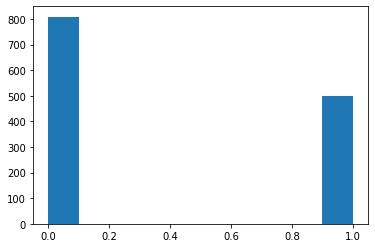

In [50]:
from matplotlib import pyplot as plt
from pyspark_dist_explore import hist
fig, ax = plt.subplots()
hist(ax, titanic_df.select("survived"))
plt.show()

### Using Pandas for Plotting DataFrames

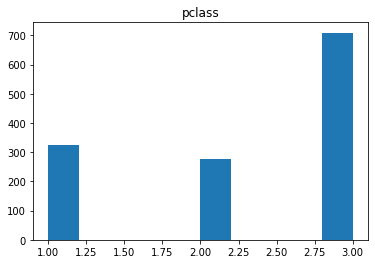

In [51]:
titanic_df_pandas = titanic_df.toPandas()
titanic_df_pandas.hist('pclass')
plt.grid(visible=None)
plt.show()

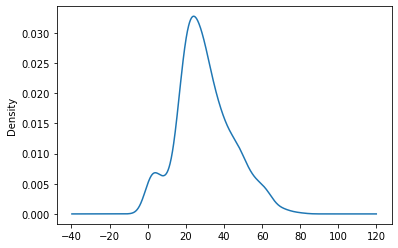

In [52]:
import matplotlib.pyplot as plt
titanic_df_pandas['age'].plot(kind = 'density')
plt.show()

In [ ]:
# Spark Count Words in a Text

In [ ]:
pwd

'/content'

Download the file Question1_v1.csv from Blackboard. The file is a csv file that is separated by semicolons (;) instead of a (,). This is a sample (for exam purposes) of a 2Gb file. You must write Map/Reduce jobs to answer the following questions:


1.   What is the total number of transactions for the different payment types? 
2.   How many transactions were paid with a Credit card in 2017?
3.   What is the total number of transactions (per city) for the top 5 cities?





In [53]:
import pandas as pd
titanic = pd.read_csv('question1_olist_v1.csv', sep =';')

In [54]:
titanic.head()

,customer_id,customer_city,customer_state,payment_type,payment_value,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,osasco,SP,credit_card,100.00,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,itapecerica,MG,credit_card,67.41,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,nova venecia,ES,credit_card,195.42,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,mendonca,MG,boleto,179.35,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,sao paulo,SP,boleto,107.01,2018-04-02 13:42:17


In [55]:
titanic['payment_type'].value_counts()

credit_card    773
boleto         193
voucher         25
debit_card       9
Name: payment_type, dtype: int64

In [63]:
import pyspark
from pyspark.sql import SparkSession
  
spark = SparkSession.builder.master('local[*]').appName("DataFrame").getOrCreate() #in master * all cores 4 -> 4 cores

In [64]:
olist_sdf = spark.read.csv("question1_olist_v1.csv", header=True, sep=';')

In [65]:
olist_sdf

DataFrame[customer_id: string, customer_city: string, customer_state: string, payment_type: string, payment_value: string, order_purchase_timestamp: string]

In [66]:
olist_sdf.show(5)

+--------------------+-------------+--------------+------------+-------------+------------------------+
|         customer_id|customer_city|customer_state|payment_type|payment_value|order_purchase_timestamp|
+--------------------+-------------+--------------+------------+-------------+------------------------+
|00012a2ce6f8dcda2...|       osasco|            SP| credit_card|       100.00|     2017-11-14 16:08:26|
|000161a058600d590...|  itapecerica|            MG| credit_card|        67.41|     2017-07-16 09:40:32|
|0001fd6190edaaf88...| nova venecia|            ES| credit_card|       195.42|     2017-02-28 11:06:43|
|0002414f953443074...|     mendonca|            MG|      boleto|       179.35|     2017-08-16 13:09:20|
|000379cdec6255224...|    sao paulo|            SP|      boleto|       107.01|     2018-04-02 13:42:17|
+--------------------+-------------+--------------+------------+-------------+------------------------+
only showing top 5 rows



In [60]:
## 1. What is the total number of transactions for the different payment types? 

In [61]:
# Method 1: Spark SQL
olist_sdf.createOrReplaceTempView("olist1")
df2 = spark.sql("SELECT payment_type, COUNT(*) FROM olist1 GROUP BY payment_type")
df2.show()

+------------+--------+
|payment_type|count(1)|
+------------+--------+
|      boleto|     193|
| credit_card|     773|
|     voucher|      25|
|  debit_card|       9|
+------------+--------+



In [ ]:
# Method 2: handyspark leverages on the recently released pandas UDFs in Spark to allow for an out-of-the-box usage of common pandas functions in a Spark dataframe.
!pip install handyspark -qq
from handyspark import *

In [ ]:
hdf = olist_sdf.toHandy()

In [ ]:
hdf.cols['payment_type'].value_counts(dropna=False)


payment_type
boleto         193
credit_card    773
debit_card       9
voucher         25
Name: value_counts, dtype: int64

In [ ]:
# 2. How many transactions were paid with a Credit card in 2017?

In [ ]:
olist_sdf.show(1)

+--------------------+-------------+--------------+------------+-------------+------------------------+
|         customer_id|customer_city|customer_state|payment_type|payment_value|order_purchase_timestamp|
+--------------------+-------------+--------------+------------+-------------+------------------------+
|00012a2ce6f8dcda2...|       osasco|            SP| credit_card|       100.00|     2017-11-14 16:08:26|
+--------------------+-------------+--------------+------------+-------------+------------------------+
only showing top 1 row



In [ ]:
# Spark SQL
olist_sdf.createOrReplaceTempView("olist2")
df2 = spark.sql("SELECT count(*) from olist2 where payment_type =='credit_card' and YEAR(order_purchase_timestamp)=='2017'")
df2.show()

+--------+
|count(1)|
+--------+
|     339|
+--------+



In [ ]:
# 3. What is the total number of transactions (per city) for the top 5 cities?

In [ ]:
olist_sdf.show(1)

+--------------------+-------------+--------------+------------+-------------+------------------------+
|         customer_id|customer_city|customer_state|payment_type|payment_value|order_purchase_timestamp|
+--------------------+-------------+--------------+------------+-------------+------------------------+
|00012a2ce6f8dcda2...|       osasco|            SP| credit_card|       100.00|     2017-11-14 16:08:26|
+--------------------+-------------+--------------+------------+-------------+------------------------+
only showing top 1 row



In [ ]:
# Spark SQL
olist_sdf.createOrReplaceTempView("olist3")
df2 = spark.sql("SELECT customer_city, count(*) from olist3 group by customer_city order by count(*) desc")
df2.show(5)

+--------------+--------+
| customer_city|count(1)|
+--------------+--------+
|     sao paulo|     165|
|rio de janeiro|      68|
|belo horizonte|      33|
|      curitiba|      19|
|      campinas|      19|
+--------------+--------+
only showing top 5 rows



In [ ]:
# 2a) How many times does the character Bennet appears in the text?
# 2b) How many total words are there in the text?

text = sc.textFile('question2_book_v1.txt')
counts = text.flatMap(lambda x: x.split(' '))
len(counts.collect())

1687

# Machine learning with Spark

In [297]:
import pyspark
from pyspark.sql import SparkSession
  
spark = SparkSession.builder.master('local[*]').appName("DataFrame").getOrCreate() #in master * all cores 4 -> 4 cores

titanic_sdf = spark.read.csv("titanic.csv", header=True, sep=',')

In [298]:
# Get number of records
print("The data contain %d records." % titanic.count())

The data contain 1309 records.


In [299]:
titanic_sdf.columns

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'homedest']

In [300]:
titanic_sdf.printSchema()

root
 |-- pclass: string (nullable = true)
 |-- survived: string (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sibsp: string (nullable = true)
 |-- parch: string (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: string (nullable = true)
 |-- homedest: string (nullable = true)



In [301]:
titanic_sdf.dtypes

[('pclass', 'string'),
 ('survived', 'string'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'string'),
 ('sibsp', 'string'),
 ('parch', 'string'),
 ('ticket', 'string'),
 ('fare', 'string'),
 ('cabin', 'string'),
 ('embarked', 'string'),
 ('boat', 'string'),
 ('body', 'string'),
 ('homedest', 'string')]

In [302]:
titanic_sdf = spark.read.csv("titanic.csv", header=True, sep=',', inferSchema = True, nullValue = 'NA')

In [303]:
titanic_sdf.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)
 |-- boat: string (nullable = true)
 |-- body: integer (nullable = true)
 |-- homedest: string (nullable = true)



## Select columns

In [304]:
titanic_sdf.dtypes

[('pclass', 'int'),
 ('survived', 'int'),
 ('name', 'string'),
 ('sex', 'string'),
 ('age', 'double'),
 ('sibsp', 'int'),
 ('parch', 'int'),
 ('ticket', 'string'),
 ('fare', 'double'),
 ('cabin', 'string'),
 ('embarked', 'string'),
 ('boat', 'string'),
 ('body', 'int'),
 ('homedest', 'string')]

In [305]:
titanic_sdf.show(5)

+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|ticket|    fare|  cabin|embarked|boat|body|            homedest|
+------+--------+--------------------+------+----+-----+-----+------+--------+-------+--------+----+----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|29.0|    0|    0| 24160|211.3375|     B5|       S|   2|null|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.92|    1|    2|113781|  151.55|C22 C26|       S|  11|null|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female| 2.0|    1|    2|113781|  151.55|C22 C26|       S|null|null|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|30.0|    1|    2|113781|  151.55|C22 C26|       S|null| 135|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|25.0|    1|    2|113781|  151.55|C22 C26|       S|null|null|Montre

In [306]:
titanic_sdf.createOrReplaceTempView("titanic")
spark.sql("SELECT homedest, COUNT(*) FROM titanic GROUP BY homedest order by count(*) desc").show(5)

+--------------------+--------+
|            homedest|count(1)|
+--------------------+--------+
|                null|     564|
|        New York, NY|      64|
|              London|      14|
|        Montreal, PQ|      10|
|Cornwall / Akron, OH|       9|
+--------------------+--------+
only showing top 5 rows



In [307]:
titanic_sdf.groupBy('sex').agg(mean('age')).show()

+------+-----------------+
|   sex|         avg(age)|
+------+-----------------+
|female|28.68708762886598|
|  male|30.58522796352583|
+------+-----------------+



In [308]:
titanic_sdf.groupBy('sex').agg(mean('survived')).show()

+------+-------------------+
|   sex|      avg(survived)|
+------+-------------------+
|female| 0.7274678111587983|
|  male|0.19098457888493475|
+------+-------------------+



In [309]:
titanic_sdf=titanic_sdf.select('pclass', 'sex', 'age', 'sibsp', 'fare', 'cabin', 'homedest','survived')

## Check for missing values in the target variable

In [310]:
titanic_sdf.filter('survived is NULL').count()

0

## Creating a new column in Spark based on a condition

In [311]:
from pyspark.sql.functions import when, col
#create a new 'child' column, assign a 1 if child <= 10 years old
conditions = when((col("age")<=10),1).otherwise(0)
titanic_sdf = titanic_sdf.withColumn('child', conditions)

In [312]:
titanic_sdf.show(2)

+------+------+----+-----+--------+-------+--------------------+--------+-----+
|pclass|   sex| age|sibsp|    fare|  cabin|            homedest|survived|child|
+------+------+----+-----+--------+-------+--------------------+--------+-----+
|     1|female|29.0|    0|211.3375|     B5|        St Louis, MO|       1|    0|
|     1|  male|0.92|    1|  151.55|C22 C26|Montreal, PQ / Ch...|       1|    1|
+------+------+----+-----+--------+-------+--------------------+--------+-----+
only showing top 2 rows



In [313]:
#create a variable called 'new_fare', round the price.

In [314]:
titanic_sdf = titanic_sdf.withColumn('rounded_fare', round(titanic_sdf['fare'],0))

In [315]:
titanic_sdf.show(2)

+------+------+----+-----+--------+-------+--------------------+--------+-----+------------+
|pclass|   sex| age|sibsp|    fare|  cabin|            homedest|survived|child|rounded_fare|
+------+------+----+-----+--------+-------+--------------------+--------+-----+------------+
|     1|female|29.0|    0|211.3375|     B5|        St Louis, MO|       1|    0|       211.0|
|     1|  male|0.92|    1|  151.55|C22 C26|Montreal, PQ / Ch...|       1|    1|       152.0|
+------+------+----+-----+--------+-------+--------------------+--------+-----+------------+
only showing top 2 rows



In [316]:
titanic_sdf=titanic_sdf.select('pclass', 'sex', 'age', 'sibsp', 'fare', 'cabin', 'homedest','child','rounded_fare','survived')

In [317]:
len(titanic_sdf.collect())

1309

In [318]:
#drop the homedest column
titanic_sdf = titanic_sdf.drop('homedest')

In [319]:
titanic_sdf.show(2)

+------+------+----+-----+--------+-------+-----+------------+--------+
|pclass|   sex| age|sibsp|    fare|  cabin|child|rounded_fare|survived|
+------+------+----+-----+--------+-------+-----+------------+--------+
|     1|female|29.0|    0|211.3375|     B5|    0|       211.0|       1|
|     1|  male|0.92|    1|  151.55|C22 C26|    1|       152.0|       1|
+------+------+----+-----+--------+-------+-----+------------+--------+
only showing top 2 rows



## Assembling Columns: consolidating all of the predictor columns into a single column

In [320]:
# Import the necessary class
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [321]:
#replace null values
titanic_sdf = titanic_sdf.fillna(0, subset=titanic_sdf.columns)

In [322]:
#convert all categorical columns to string index
categoricalColumns = [item[0] for item in titanic_sdf.dtypes if item[1].startswith('string') ]

In [323]:
categoricalColumns

['sex', 'cabin']

In [324]:
#create an indexer for sex
indexer = StringIndexer(inputCol='sex', outputCol='sex_idx')

#indexer identifies categories in the data
indexer_model = indexer.fit(titanic_sdf)

#indexer creates a new column with numeric index values
titanic_sdf = indexer_model.transform(titanic_sdf)

In [325]:
titanic_sdf.show(5)
#drop the sex column
titanic_sdf = titanic_sdf.drop('sex')
titanic_sdf = titanic_sdf.drop('cabin')

+------+------+----+-----+--------+-------+-----+------------+--------+-------+
|pclass|   sex| age|sibsp|    fare|  cabin|child|rounded_fare|survived|sex_idx|
+------+------+----+-----+--------+-------+-----+------------+--------+-------+
|     1|female|29.0|    0|211.3375|     B5|    0|       211.0|       1|    1.0|
|     1|  male|0.92|    1|  151.55|C22 C26|    1|       152.0|       1|    0.0|
|     1|female| 2.0|    1|  151.55|C22 C26|    1|       152.0|       0|    1.0|
|     1|  male|30.0|    1|  151.55|C22 C26|    0|       152.0|       0|    0.0|
|     1|female|25.0|    1|  151.55|C22 C26|    0|       152.0|       0|    1.0|
+------+------+----+-----+--------+-------+-----+------------+--------+-------+
only showing top 5 rows



In [326]:
#create a list of numerical columns
numericalColumns = [item[0] for item in titanic_sdf.dtypes if ~item[1].startswith('string') ]

In [327]:
# Create an assembler object. Problem can be caused by null values in the columns being assembled
assembler = VectorAssembler(inputCols=['pclass', 'sex_idx', 'age', 'sibsp', 'fare', 'child', 'rounded_fare', 'survived'], outputCol='features')

In [328]:
predictors_assembled = assembler.setHandleInvalid("skip").transform(titanic_sdf)

In [359]:
predictors_assembled.show()

+------+----+-----+--------+-----+------------+--------+-------+--------------------+
|pclass| age|sibsp|    fare|child|rounded_fare|survived|sex_idx|            features|
+------+----+-----+--------+-----+------------+--------+-------+--------------------+
|     1|29.0|    0|211.3375|    0|       211.0|       1|    1.0|[1.0,1.0,29.0,0.0...|
|     1|0.92|    1|  151.55|    1|       152.0|       1|    0.0|[1.0,0.0,0.92,1.0...|
|     1| 2.0|    1|  151.55|    1|       152.0|       0|    1.0|[1.0,1.0,2.0,1.0,...|
|     1|30.0|    1|  151.55|    0|       152.0|       0|    0.0|[1.0,0.0,30.0,1.0...|
|     1|25.0|    1|  151.55|    0|       152.0|       0|    1.0|[1.0,1.0,25.0,1.0...|
|     1|48.0|    0|   26.55|    0|        27.0|       1|    0.0|[1.0,0.0,48.0,0.0...|
|     1|63.0|    1| 77.9583|    0|        78.0|       1|    1.0|[1.0,1.0,63.0,1.0...|
|     1|39.0|    0|     0.0|    0|         0.0|       0|    0.0|(8,[0,2],[1.0,39.0])|
|     1|53.0|    2| 51.4792|    0|        51.0|       

The final step in preparing the titanic data is to consolidate the various predictors into a single column. This is necessary because the Machine Learning algorithms in Spark operate on a single vector of predictors, although each element in that vector may consist of multiple values. 

In [330]:
# Check the resulting column
titanic_ml = predictors_assembled.select('features', 'survived')
titanic_ml.show(5)

+--------------------+--------+
|            features|survived|
+--------------------+--------+
|[1.0,1.0,29.0,0.0...|       1|
|[1.0,0.0,0.92,1.0...|       1|
|[1.0,1.0,2.0,1.0,...|       0|
|[1.0,0.0,30.0,1.0...|       0|
|[1.0,1.0,25.0,1.0...|       0|
+--------------------+--------+
only showing top 5 rows



In [366]:
# Split into training and testing sets in a 80:20 ratio
(trainingData, testData) = titanic_ml.randomSplit([0.8, 0.2])

In [367]:
trainingData.show()

+--------------------+--------+
|            features|survived|
+--------------------+--------+
|       (8,[0],[1.0])|       0|
|       (8,[0],[2.0])|       0|
|       (8,[0],[2.0])|       0|
|       (8,[0],[2.0])|       0|
|       (8,[0],[2.0])|       0|
|       (8,[0],[2.0])|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
|(8,[0,1,4,6],[3.0...|       0|
+--------------------+--------+
only showing top 20 rows



In [368]:
# Import the Decision Tree Classifier class
from pyspark.ml.classification import DecisionTreeClassifier

# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier(maxDepth=3, labelCol="survived")
tree_model = tree.fit(trainingData)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(testData)
prediction.select('survived', 'prediction', 'probability').show(5, False)

+--------+----------+-----------+
|survived|prediction|probability|
+--------+----------+-----------+
|0       |0.0       |[1.0,0.0]  |
|0       |0.0       |[1.0,0.0]  |
|0       |0.0       |[1.0,0.0]  |
|0       |0.0       |[1.0,0.0]  |
|0       |0.0       |[1.0,0.0]  |
+--------+----------+-----------+
only showing top 5 rows



In [369]:
# Create a confusion matrix
prediction.groupBy('survived', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND survived = prediction').count()
TP = prediction.filter('prediction = 1 AND survived = prediction').count()
FN = prediction.filter('prediction = 0 AND survived != prediction').count()
FP = prediction.filter('prediction = 1 AND survived != prediction').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+--------+----------+-----+
|survived|prediction|count|
+--------+----------+-----+
|       0|       0.0|  145|
|       1|       1.0|  100|
+--------+----------+-----+

1.0


In [370]:
# Import the logistic regression class
from pyspark.ml.classification import LogisticRegression

# Create a classifier object and train on training data
logistic = LogisticRegression(labelCol="survived").fit(trainingData)

# Create predictions for the testing data and show confusion matrix
prediction = logistic.transform(testData)
prediction.groupBy('survived', 'prediction').count().show()

+--------+----------+-----+
|survived|prediction|count|
+--------+----------+-----+
|       0|       0.0|  145|
|       1|       1.0|  100|
+--------+----------+-----+



In [371]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall    = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator(labelCol="survived")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="survived")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

precision = 1.00
recall    = 1.00


In [ ]:
#stops the Spark session once we are done
spark.stop()

In [ ]:
#SELECT count(payment_type) FROM olist2 where payment_type ='credit_card' and YEAR(order_purchase_timestamp)='2017'
#SELECT customer_city, count(payment_type) FROM olist3 GROUP BY customer_city ORDER BY count(payment_type) desc